In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [2]:
data.shape

(4340, 8)

In [3]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

<AxesSubplot:>

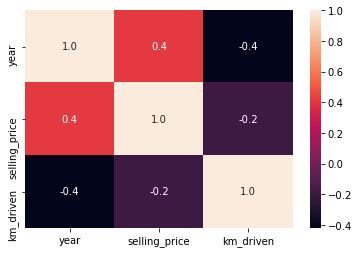

In [4]:
sns.heatmap(data.corr(), annot = True, fmt="0.1f")

In [5]:
len(data.name.unique())

1491

In [6]:
data["company"] = data.name.str.split().str.slice(0,1)
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,[Maruti]
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,[Maruti]
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,[Hyundai]
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,[Datsun]
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,[Honda]
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,[Hyundai]
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,[Hyundai]
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,[Maruti]
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,[Hyundai]


In [7]:
def convert(x):
  return x[0]

data["company"] = data["company"].apply(convert)

In [8]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [9]:
data.drop("owner", axis = 1, inplace = True)
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,company
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Honda


In [10]:
data.select_dtypes("object").columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'company'], dtype='object')

In [11]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
company          0
dtype: int64

In [12]:
data.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [13]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [14]:
data = data[data.selling_price < 6e6]

In [15]:
data.describe()

,year,selling_price,km_driven
count,4338.000000,4.338000e+03,4338.000000
mean,2013.089212,5.004294e+05,66241.810512
std,4.215666,5.523828e+05,46639.036337
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.062492e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,5.500000e+06,806599.000000


In [16]:
data.shape

(4338, 8)

In [17]:
x = data.drop(columns = "selling_price")
y = data["selling_price"]

In [18]:
x

,name,year,km_driven,fuel,seller_type,transmission,company
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,Maruti
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,Maruti
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,Hyundai
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,Datsun
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Honda
...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,Diesel,Individual,Manual,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,80000,Diesel,Individual,Manual,Hyundai
4337,Maruti 800 AC BSIII,2009,83000,Petrol,Individual,Manual,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,Diesel,Individual,Manual,Hyundai


In [19]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4338, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

x1, x2, y1, y2 = train_test_split(x,y,test_size = 0.3)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [22]:
ohe = OneHotEncoder()
ohe.fit(x[['name', 'fuel', 'seller_type', 'transmission', 'company']])

OneHotEncoder()

In [23]:
ohe.categories_

[array(['Ambassador CLASSIC 1500 DSL AC', 'Ambassador Classic 2000 Dsz',
        'Ambassador Grand 1800 ISZ MPFI PW CL', ...,
        'Volvo XC 90 D5 Inscription BSIV', 'Volvo XC60 D3 Kinetic',
        'Volvo XC60 D5 Inscription'], dtype=object),
 array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object),
 array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
        'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
        'Jeep', 'Kia', 'Land', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
        'Mitsubishi', 'Nissan', 'OpelCorsa', 'Renault', 'Skoda', 'Tata',
        'Toyota', 'Volkswagen', 'Volvo'], dtype=object)]

In [24]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['name', 'fuel', 'seller_type', 'transmission', 'company']),
                                      remainder="passthrough")

In [25]:
lr = LinearRegression()

In [26]:
pipe = make_pipeline(column_trans, lr)

In [27]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador CLASSIC 1500 DSL AC', 'Ambassador Classic 2000 Dsz',
       'Ambassador Grand 1800 ISZ MPFI PW CL', ...,
       'Volvo XC 90 D5 Inscription BSIV', 'Volvo XC60 D3 Kinetic',
       'Volvo XC60 D5 Inscription'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'E...
                                                                            array(['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
       'Jeep', 'Kia', 'Land', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'OpelCorsa', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)]),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'company'])])),
                ('linearregression', LinearRegression())])

In [28]:
pipe.fit(x1,y1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador CLASSIC 1500 DSL AC', 'Ambassador Classic 2000 Dsz',
       'Ambassador Grand 1800 ISZ MPFI PW CL', ...,
       'Volvo XC 90 D5 Inscription BSIV', 'Volvo XC60 D3 Kinetic',
       'Volvo XC60 D5 Inscription'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'E...
                                                                            array(['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
       'Jeep', 'Kia', 'Land', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'OpelCorsa', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)]),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'company'])])),
                ('linearregression', LinearRegression())])

In [29]:
ypred = pipe.predict(x2)
ypred

array([ 406958.01666407,  390507.38649938,  474735.83053257, ...,
        878549.68983179,  407523.82053192, 3803373.22554849])

In [30]:
r2_score(y2,ypred)

0.875960019226616

In [31]:
pipe.score(x2,y2)

0.875960019226616

In [32]:
input_data = [["Maruti Wagon R LXI Minor",2007,50000,"Petrol","Individual","Manual","Maruti"]]
new_data = pd.DataFrame(input_data, columns=["name","year","km_driven","fuel","seller_type","transmission","company"])
new_data

,name,year,km_driven,fuel,seller_type,transmission,company
0,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,Maruti


In [33]:
pipe.predict(new_data)

array([132189.10641734])